# CVEN 303 Lidar Data Analysis by Python
### Copyright 2020
#### Katherine Stevens, katherine.stevens@tamu.edu, (516)850-6444.
Faculty, researchers, and students own copyright in their
scholarly or educational work at Texas A&M University, as
stated in the Texas A&M University System Policy for
Intellectual Property Management and Commercialization
(http://policietamus.edu/17-01.pdf)

# I. Introduction
#### This lab will use Python to process Lidar data from a 2 mile road Right of Way (ROW) data. This lab includes the following tasks:
Load Python Packages:  
Read Lidar data in Panda and extract the first 2 miles
dataframe  
Plot the longitude profile of roadway from edge of pavement
to ROW  
Plot ditch flowline  
Find ditch low point location and draw the cross-section  

# II. Load Packages

In [1]:
import numpy as np #import numpy with function variable np
import pandas as pd #import pandas with function variable pd
import matplotlib.pyplot as plt #import matplotlib.pyplot with function variable plt

# III. Read Data
The Lidar text file includes approximately 6 miles of roadway
data with 3-ft spacing (in metrics units). The column (Z 3.5)
represents the approximate edge of pavement and the column (Z
12.644) represents the approximate right-of-way line. Read
file into a Dataframe using Panda Dataframe to learn more
about Panda Dataframe see https://pandas.pydata.org/pandasdocs/stable/getting_started/dsintro.html  
Note: Data is in meters.

In [4]:
df_raw = pd.read_csv('US385_Sect1_458to464.txt', # read file
                     header=0,
                     delimiter = "\t",
                    )
df_raw #output data

,Num,Loc,Z 3.5,Z 4.4144,Z 5.3288,Z 6.2432,Z 7.1576,Z 8.072,Z 8.9864,Z 9.9008,Z 10.8152,Z 11.7296,Z 12.644
0,2,168.3628,914.5874,914.5714,914.5190,914.3577,914.2766,914.2172,914.1895,914.2083,914.2249,914.3258,914.3877
1,3,169.2772,914.6072,914.5985,914.5285,914.4319,914.3281,914.2512,914.2375,914.2495,914.2712,914.3735,914.4463
2,4,170.1916,914.6185,914.5959,914.5829,914.4361,914.3269,914.2283,914.2142,914.2430,914.2735,914.3761,914.4575
3,5,171.1060,914.6121,914.5998,914.6072,914.4223,914.3282,914.2484,914.1931,914.2502,914.2675,914.3629,914.4506
4,6,172.0204,914.6050,914.5874,914.5446,914.4133,914.3095,914.2268,914.1990,914.2241,914.2617,914.3785,914.4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,10123,9423.0052,985.3918,985.3474,985.3365,985.3048,985.3361,985.3918,985.4442,985.4852,985.4933,985.6324,985.6730
10122,10124,9423.9196,985.4109,985.3880,985.3573,985.3372,985.3331,985.3826,985.4461,985.5099,985.5650,985.6449,985.9288
10123,10125,9424.8340,985.4105,985.3973,985.3449,985.3778,985.3571,985.3628,985.4303,985.4752,985.5604,985.6867,986.2820
10124,10126,9425.7484,985.4343,985.3854,985.3662,985.3423,985.3492,985.3982,985.4303,985.4796,985.5449,985.7390,985.9960


In [12]:
df = df_raw.drop("Num", axis=1) # drop one column
df.set_index('Loc', inplace=True) # set location as index
mask = df.index<= 3387.0528 #index of dataframe
df=df[mask] # conditional, all data larger than index removed
df['Z_min'] = df.min(axis=1) # find minimum for every cross section/row

df #output data

,Z 3.5,Z 4.4144,Z 5.3288,Z 6.2432,Z 7.1576,Z 8.072,Z 8.9864,Z 9.9008,Z 10.8152,Z 11.7296,Z 12.644,Z_min
Loc,,,,,,,,,,,,
168.3628,914.5874,914.5714,914.5190,914.3577,914.2766,914.2172,914.1895,914.2083,914.2249,914.3258,914.3877,914.1895
169.2772,914.6072,914.5985,914.5285,914.4319,914.3281,914.2512,914.2375,914.2495,914.2712,914.3735,914.4463,914.2375
170.1916,914.6185,914.5959,914.5829,914.4361,914.3269,914.2283,914.2142,914.2430,914.2735,914.3761,914.4575,914.2142
171.1060,914.6121,914.5998,914.6072,914.4223,914.3282,914.2484,914.1931,914.2502,914.2675,914.3629,914.4506,914.1931
172.0204,914.6050,914.5874,914.5446,914.4133,914.3095,914.2268,914.1990,914.2241,914.2617,914.3785,914.4179,914.1990
...,...,...,...,...,...,...,...,...,...,...,...,...
3383.3932,920.9912,920.7870,920.6545,920.6060,920.5870,920.5995,920.6024,920.6594,920.7858,921.0525,921.2849,920.5870
3384.3076,920.9961,920.8273,920.6666,920.6487,920.6455,920.6300,920.6317,920.6978,920.8268,921.0318,921.3481,920.6300
3385.2220,921.0197,920.8743,920.7071,920.6804,920.6477,920.6665,920.6766,920.7302,920.8525,921.0892,921.3631,920.6477


# IV. Plots

(168.3628, 3388.0508)

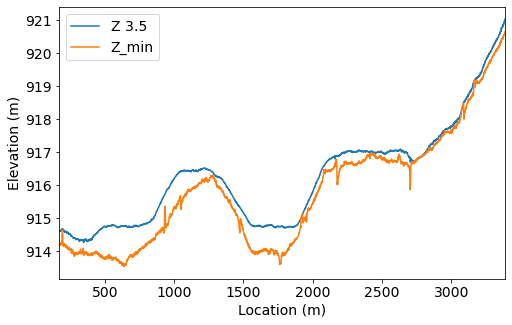

In [14]:
plt.figure(figsize=(8,5)) # plot function, create space
df['Z 3.5'].plot() # plot Z 3.5 column
df['Z_min'].plot() # plot Z_min column
plt.ylabel('Elevation (m)',fontsize=14) # y label is Elevation
plt.xlabel('Location (m)',fontsize=14) # x label is Location
plt.legend(fontsize=14) # need legend to tell between lines 
plt.xticks(size = 14) #size of numbers x axis
plt.yticks(size = 14) #size of numbers y axis

plt.xlim(168.3628, 3388.0508) # start and end point of graph

In [19]:
df['FL']= df.idxmin(axis=1).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float) # index the lowest point in each row and extract number only from string

df

,Z 3.5,Z 4.4144,Z 5.3288,Z 6.2432,Z 7.1576,Z 8.072,Z 8.9864,Z 9.9008,Z 10.8152,Z 11.7296,Z 12.644,Z_min,FL
Loc,,,,,,,,,,,,,
168.3628,914.5874,914.5714,914.5190,914.3577,914.2766,914.2172,914.1895,914.2083,914.2249,914.3258,914.3877,914.1895,8.9864
169.2772,914.6072,914.5985,914.5285,914.4319,914.3281,914.2512,914.2375,914.2495,914.2712,914.3735,914.4463,914.2375,8.9864
170.1916,914.6185,914.5959,914.5829,914.4361,914.3269,914.2283,914.2142,914.2430,914.2735,914.3761,914.4575,914.2142,8.9864
171.1060,914.6121,914.5998,914.6072,914.4223,914.3282,914.2484,914.1931,914.2502,914.2675,914.3629,914.4506,914.1931,8.9864
172.0204,914.6050,914.5874,914.5446,914.4133,914.3095,914.2268,914.1990,914.2241,914.2617,914.3785,914.4179,914.1990,8.9864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383.3932,920.9912,920.7870,920.6545,920.6060,920.5870,920.5995,920.6024,920.6594,920.7858,921.0525,921.2849,920.5870,7.1576
3384.3076,920.9961,920.8273,920.6666,920.6487,920.6455,920.6300,920.6317,920.6978,920.8268,921.0318,921.3481,920.6300,8.0720
3385.2220,921.0197,920.8743,920.7071,920.6804,920.6477,920.6665,920.6766,920.7302,920.8525,921.0892,921.3631,920.6477,7.1576


(168.3628, 3388.0508)

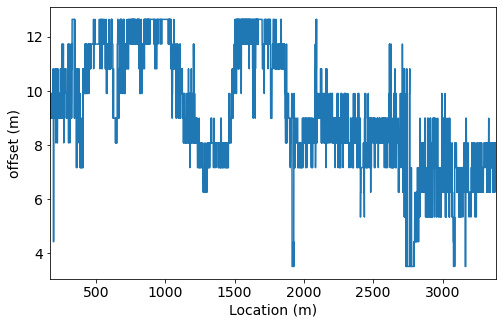

In [21]:
df['FL'].plot(figsize=(8,5)) # enter figure size for top view plot
plt.ylabel('offset (m)',fontsize=14) # y axis label offset
plt.xlabel('Location (m)',fontsize=14) # x axis label location
plt.xticks(size = 14) # size of x values
plt.yticks(size = 14) #size of y values

plt.xlim(168.3628, 3388.0508) # start and end point of graph, consistant with last one

Text(0.5, 1.0, 'Cross-section at 638.3644m')

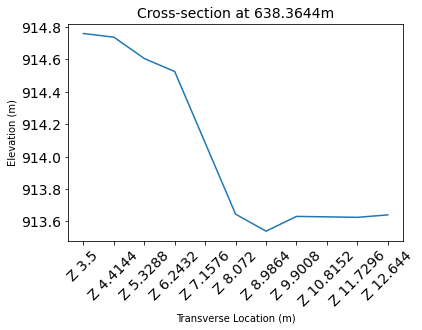

In [27]:
y=df.loc[df['Z_min'].idxmin()][:-2].values # returns index of minimum value of Z_min column
x=df.loc[df['Z_min'].idxmin()][:-2].index # transverse location
Location=str(df.loc[df['Z_min'].idxmin()].name)# returns the location of the lowest point
plt.plot(x,y) # plot on x y coordinates
plt.xticks(size=14, rotation=45) # size and rotation of x values
plt.yticks(size = 14) # size of y values
plt.ylabel('Elevation (m)') # y axis label
plt.xlabel('Transverse Location (m)') # x axis label

plt.title('Cross-section at ' + Location + 'm', fontsize=14) # add title to figure
